In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data

We're using the updated dataset we created in the [descriptive stats notebook](descriptive_stats.ipynb).

In [2]:
df = pd.read_csv('../../data/fortnite_players_stats_updated.csv')

# Visualize the data

First look at the data.

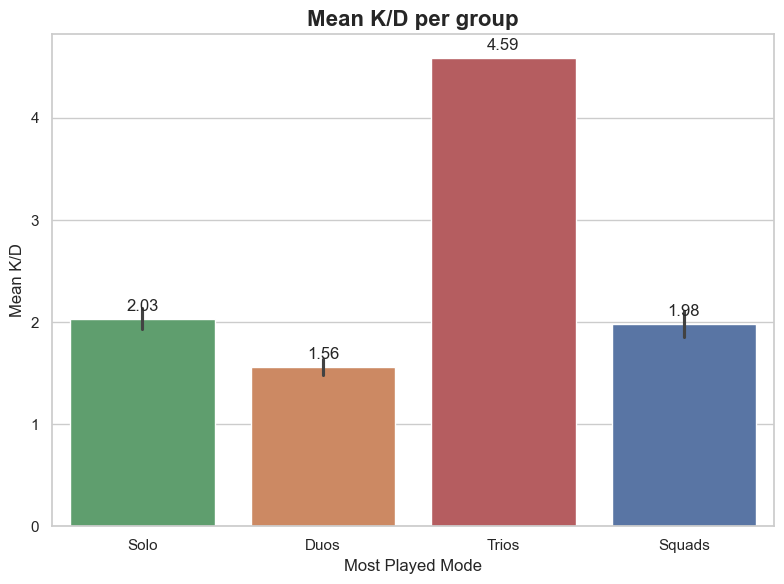

In [8]:
# Create the bar plot to visualize the mean difference
custom_order = ['Solo', 'Duos', 'Trios', 'Squads']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    x='most_played_mode',
    y='Solo kd',
    data=df,
    hue='most_played_mode',
    order=custom_order
)

# Add titles and labels for clarity
plt.title('Mean Solo K/D per group', fontsize=16, fontweight='bold')
plt.xlabel('Most Played Mode', fontsize=12)
plt.ylabel('Mean Solo K/D', fontsize=12)

# Add the mean value on top of each bar
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

# Display the plot
plt.tight_layout()
plt.show()

# Compare the means of two groups

Let's see if people who usually play in groups differ in their solo performance. We'll answer this question:
> Is there a statistically significant difference in `Solo K/D` between players who primarily play Squads and players who primarily play Solo?

In [9]:
# 1. Separate the 'kills' data into two series, one for each team
team_solo_kd = df[df['most_played_mode'] == 'Solo']['Solo kd']
team_squads_kd = df[df['most_played_mode'] == 'Squads']['Solo kd']

In [10]:
# 2. Perform an independent samples t-test
# The ttest_ind function compares the means of two independent groups
# The 'equal_var=False' argument performs Welch's t-test, which is generally
# a safer choice when group variances might be different.
t_statistic, p_value = stats.ttest_ind(team_solo_kd, team_squads_kd, equal_var=False)


In [11]:
# 3. Print the results
print("Solo Players' mean k/d:", team_solo_kd.mean())
print("Squads Players' mean k/d:", team_squads_kd.mean())
print("-" * 30)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Solo Players' mean k/d: 2.0330859375
Squads Players' mean k/d: 1.9776333333333331
------------------------------
T-Statistic: 0.6409453297133237
P-Value: 0.5217735923559662


In [12]:
# 4. Interpret the p-value to draw a conclusion
# The p-value tells us the probability of observing a difference this large
# by random chance. We typically use a significance level of 0.05.
print("\nConclusion:")
if p_value < 0.05:
    print("The difference in mean k/d between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference in mean k/d between the two groups.")


Conclusion:
There is no statistically significant difference in mean k/d between the two groups.
